In [46]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [47]:
# Importing the dataset
dataset = pd.read_csv('Bank_Predictions.csv')
X = dataset.iloc[:, 3:13].values
y = dataset.iloc[:, 13].values
dataset.head(10)

,Number,Customer_ID,Last_Name,Cr_Score,Location,Gender,Age,History,Current_Balance,Num_Of_Products,Has_CrCard,IsActiveMember,Customer_Salary,Acc_Closed
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,Hanah,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


In [48]:
# ------ Part-1: Data preprocessing ----------
# Encoding categorical data
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
labelencoder_X_1 = LabelEncoder()
X[:, 1] = labelencoder_X_1.fit_transform(X[:, 1])

labelencoder_X_2 = LabelEncoder()
X[:, 2] = labelencoder_X_2.fit_transform(X[:, 2])

column_transformer = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(), [1]),
    ],
    remainder='passthrough'
)

X = column_transformer.fit_transform(X)
X = X[:, 1:]

In [49]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [50]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [51]:
# ------- Part-2: Build the ANN --------

# import keras library and packages
import keras
from keras.models import Sequential
from keras.layers import Dense


In [52]:
# Initializing the ANN
classifier = Sequential()

In [53]:
# Adding the input layer and the first hidden layer
classifier.add(Dense(units=6, kernel_initializer='uniform', activation='relu', input_dim=11))


In [54]:
# Adding second hidden layer
classifier.add(Dense(units=6, kernel_initializer='uniform', activation='relu'))

In [55]:
# Adding output layer
classifier.add(Dense(units=1, kernel_initializer='uniform', activation='sigmoid'))


In [56]:
# Compiling the ANN
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [57]:
# Fitting the ANN to the training set
classifier.fit(X_train, y_train, batch_size=10, epochs=100)

Epoch 1/100
800/800 [==============================] - 4s 2ms/step - loss: 0.4863 - accuracy: 0.7956
Epoch 2/100
800/800 [==============================] - 1s 2ms/step - loss: 0.4305 - accuracy: 0.7960
Epoch 3/100
800/800 [==============================] - 1s 2ms/step - loss: 0.4259 - accuracy: 0.7960
Epoch 4/100
800/800 [==============================] - 1s 2ms/step - loss: 0.4220 - accuracy: 0.8021
Epoch 5/100
800/800 [==============================] - 1s 2ms/step - loss: 0.4185 - accuracy: 0.8234
Epoch 6/100
800/800 [==============================] - 1s 2ms/step - loss: 0.4162 - accuracy: 0.8251
Epoch 7/100
800/800 [==============================] - 1s 2ms/step - loss: 0.4143 - accuracy: 0.8299
Epoch 8/100
800/800 [==============================] - 2s 2ms/step - loss: 0.4130 - accuracy: 0.8303
Epoch 9/100
800/800 [==============================] - 2s 3ms/step - loss: 0.4115 - accuracy: 0.8317
Epoch 10/100
800/800 [==============================] - 1s 2ms/step - loss: 0.4108 - accura

In [58]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

63/63 [==============================] - 0s 1ms/step


In [59]:
# Making the confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)


[[1551   44]
 [ 274  131]]


In [60]:
from sklearn.metrics import accuracy_score, classification_report
report = classification_report(y_test, y_pred)

In [61]:
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.97      0.91      1595
           1       0.75      0.32      0.45       405

    accuracy                           0.84      2000
   macro avg       0.80      0.65      0.68      2000
weighted avg       0.83      0.84      0.81      2000



In [62]:
# Compute ROC curve and AUC
from sklearn.metrics import roc_curve, roc_auc_score, auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

In [63]:
# Calculate AUC (Area Under the ROC Curve)
roc_auc = auc(fpr, tpr)

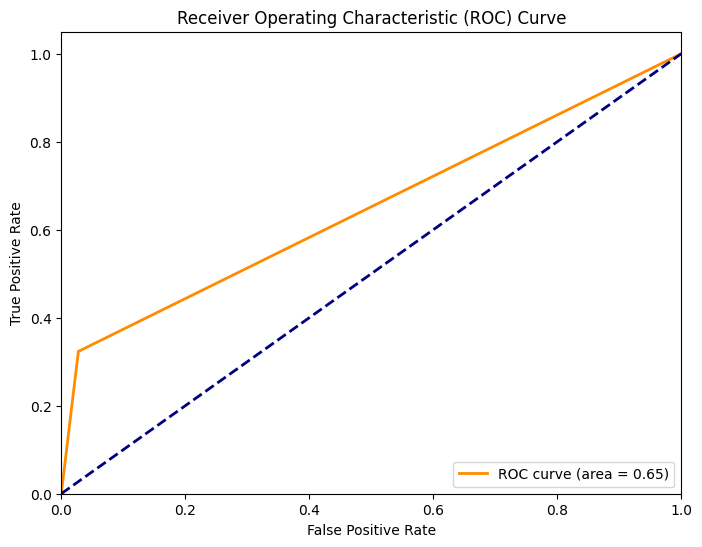

In [64]:
# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()




In [65]:
for i in range(len(y_pred)):
    if y_pred[i]:
        print(f"Account {i+1} is at risk of closure.")
    else:
        print(f"Account {i+1} is not at risk of closure.")


Account 1 is not at risk of closure.
Account 2 is not at risk of closure.
Account 3 is not at risk of closure.
Account 4 is not at risk of closure.
Account 5 is not at risk of closure.
Account 6 is at risk of closure.
Account 7 is not at risk of closure.
Account 8 is not at risk of closure.
Account 9 is not at risk of closure.
Account 10 is at risk of closure.
Account 11 is not at risk of closure.
Account 12 is not at risk of closure.
Account 13 is not at risk of closure.
Account 14 is not at risk of closure.
Account 15 is at risk of closure.
Account 16 is not at risk of closure.
Account 17 is not at risk of closure.
Account 18 is not at risk of closure.
Account 19 is not at risk of closure.
Account 20 is not at risk of closure.
Account 21 is not at risk of closure.
Account 22 is not at risk of closure.
Account 23 is not at risk of closure.
Account 24 is not at risk of closure.
Account 25 is not at risk of closure.
Account 26 is not at risk of closure.
Account 27 is not at risk of clos